# Reducción de Dimensionalidad con PCA: Comprar o Alquilar

## Carga y Preprocesamiento de Datos

In [2]:

# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos
data = pd.read_csv('comprar_alquilar.csv')

# Separar características y variable objetivo
X = data.drop(columns=['comprar'])
y = data['comprar']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mostrar un resumen de los datos estandarizados
pd.DataFrame(X_scaled, columns=X.columns).head()


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
0,0.620129,0.104689,-1.698954,0.504359,0.649475,0.195910,-1.227088,0.562374,-0.984420
1,1.063927,-0.101625,-0.712042,-0.515401,0.259224,1.937370,-0.029640,1.295273,0.596915
2,0.891173,0.226266,-0.912634,1.667244,1.080309,-0.379102,1.167809,-0.170526,1.387582
3,1.274209,1.128886,-1.578599,-1.559015,0.909604,2.114062,-1.227088,-0.903426,-0.589086
4,0.719611,-0.400042,0.090326,0.027279,0.159468,-0.179497,-1.227088,-0.903426,-0.589086


## Análisis de Componentes Principales

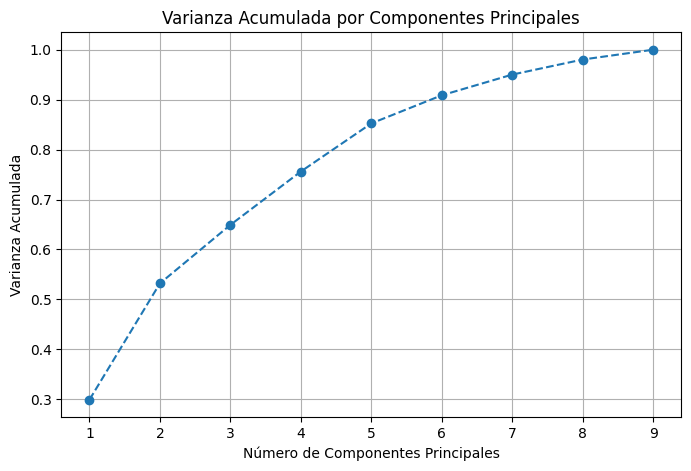

Número óptimo de componentes: 5


In [3]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA y calcular la varianza explicada
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Gráfica de varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid(True)
plt.show()

# Determinar el número de componentes necesarias para alcanzar el 80% de varianza explicada
num_components_80 = (cumulative_variance >= 0.80).argmax() + 1
print(f"Número óptimo de componentes: {num_components_80}")


## Reducción de Dimensionalidad

In [4]:

# Aplicar PCA con el número óptimo de componentes
pca_optimal = PCA(n_components=num_components_80)
X_reduced = pca_optimal.fit_transform(X_scaled)

# Mostrar la proporción de varianza explicada por las componentes seleccionadas
explained_variance_optimal = pca_optimal.explained_variance_ratio_.sum()
print(f"Varianza explicada por las {num_components_80} componentes: {explained_variance_optimal:.2f}")


Varianza explicada por las 5 componentes: 0.85


## Visualización e Interpretación de Resultados

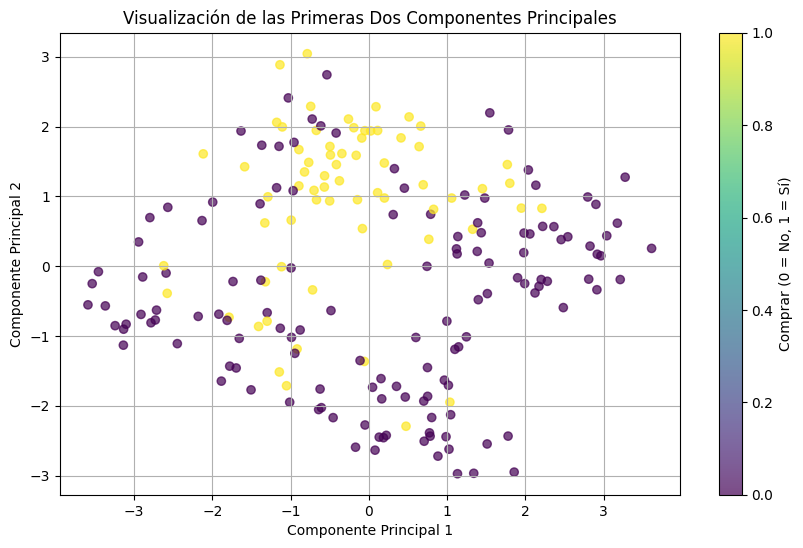

In [5]:

# Visualizar las dos primeras componentes principales
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('Visualización de las Primeras Dos Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Comprar (0 = No, 1 = Sí)')
plt.grid(True)
plt.show()
